Let's start by importing all our libraries

In [0]:
import matplotlib
import matplotlib.pyplot as pp
import seaborn as sns
import sklearn 
import xlrd

%matplotlib inline

In [0]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

Improting the Data 

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.tree import DecisionTreeRegressor

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# save filepath to variable for easier access
melbourne_file_path = '/content/drive/My Drive/Melbourne data/Melbourne_Full_new.csv'
# read the data and store data in DataFrame titled melbourne_data
Melhousing_data = pd.read_csv(melbourne_file_path) 

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [26]:
Melhousing_data = pd.read_csv(melbourne_file_path) 
Melhousing_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea,Population,List of schools,list of hospitals,sports facilities available
0,Abbotsford,49 Lithgow St,3,h,1490000,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,8184,3,0,11
1,Abbotsford,59A Turner St,3,h,1220000,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,8184,3,0,11
2,Abbotsford,119B Yarra St,3,h,1420000,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council,8184,3,0,11
3,Aberfeldie,68 Vida St,3,h,1515000,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council,3897,10,1,28
4,Airport West,92 Clydesdale Rd,2,h,670000,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council,7564,6,0,22


Text data needs to be converted into numbers that our model can use, so let's change that now. We'll also fill any empty cells with 0

In [27]:
Melhousing_data  = pd.get_dummies(Melhousing_data, columns=["Suburb","SellerG","Regionname", "CouncilArea","Type","Method","Address","Date"])
Melhousing_data.fillna(value=0.0, inplace=True)
Melhousing_data

,Rooms,Price,Postcode,Propertycount,Distance,Population,List of schools,list of hospitals,sports facilities available,Suburb_Abbotsford,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,Suburb_Armadale,Suburb_Ascot Vale,Suburb_Ashburton,Suburb_Ashwood,Suburb_Aspendale,Suburb_Aspendale Gardens,Suburb_Attwood,Suburb_Avondale Heights,Suburb_Bacchus Marsh,Suburb_Balaclava,Suburb_Balwyn,Suburb_Balwyn North,Suburb_Bayswater,Suburb_Bayswater North,Suburb_Beaconsfield,Suburb_Beaconsfield Upper,Suburb_Beaumaris,Suburb_Belgrave,Suburb_Belgrave Heights,Suburb_Belgrave South,...,Date_28/05/2016,Date_28/07/2018,Date_28/08/2016,Date_28/10/2017,Date_29/04/2017,Date_29/07/2017,Date_3/02/2018,Date_3/03/2018,Date_3/06/2017,Date_3/09/2016,Date_3/09/2017,Date_3/12/2016,Date_30/06/2018,Date_30/07/2016,Date_30/09/2017,Date_30/12/2017,Date_31/03/2018,Date_4/02/2016,Date_4/03/2017,Date_4/06/2016,Date_4/08/2018,Date_4/11/2017,Date_5/05/2018,Date_6/01/2018,Date_6/05/2017,Date_6/08/2016,Date_6/10/2018,Date_7/04/2018,Date_7/05/2016,Date_7/07/2018,Date_7/10/2017,Date_7/11/2016,Date_8/01/2018,Date_8/04/2017,Date_8/07/2017,Date_8/09/2018,Date_8/10/2016,Date_9/06/2018,Date_9/09/2017,Date_9/12/2017
0,3,1490000,3067,4019,3.0,8184,3,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1220000,3067,4019,3.0,8184,3,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1420000,3067,4019,3.0,8184,3,0,11,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1515000,3040,1543,7.5,3897,10,1,28,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,670000,3042,3464,10.4,7564,6,0,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48418,2,347700,3199,17055,38.0,36097,19,7,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48419,3,808000,3072,14577,8.4,32851,11,1,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48420,3,566000,3064,5833,20.6,21817,17,1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48421,3,500000,3064,5833,20.6,21817,17,1,43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
melbourne_predictors = ['Rooms','Distance', 'Postcode', 
                        'Propertycount','Population','List of schools', 'list of hospitals','sports facilities available']
melbourne_predictors

['Rooms',
 'Distance',
 'Postcode',
 'Propertycount',
 'Population',
 'List of schools',
 'list of hospitals',
 'sports facilities available']

Let's split the data into training and testing sets

In [0]:
from sklearn.model_selection import train_test_split
Y = Melhousing_data.Price
X = Melhousing_data[melbourne_predictors]


In [0]:
from sklearn.model_selection import train_test_split
 
  
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 20, random_state= 0)  #training and trsting the data
#standard test:train ratio is taken as 80:20

Comparing the performance of the gradient Booster Regressor performance at learning rates

In [56]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000,learning_rate=0.05, max_features=2, max_depth=2, random_state=0)
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train,Y_train)


[04:59:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, max_features=2, min_child_weight=1, missing=None,
             n_estimators=1000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

Printing the mean absoulte Error

In [0]:
predictions = my_model.predict(X_test)
errors = abs(predictions - Y_test)

Printing the Accuracy for training and validating the data

In [59]:
mape = 100 * (errors / Y_test)     #mean absolute percentage error
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 79.47 %.


Pronting the r^2 value

In [61]:
from sklearn import metrics
print('r^2 =',metrics.explained_variance_score(Y_test,predictions))

r^2 = 0.6051703066261311


Ploting the the Melbourne predictors 

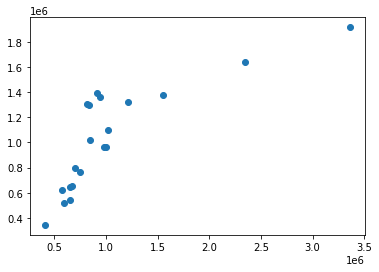

In [62]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions) 